In [1]:
import tensorflow as tf
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_image_files = ['images/2.jpg', 'images/3.jpg', 'images/4.jpg', 'images/5.jpg']
images = []
for path_to_image_file in path_to_image_files:
    image = tf.image.decode_jpeg(tf.read_file(path_to_image_file), channels=3)
    image = tf.reshape(image, [27, 116, 3])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.multiply(tf.subtract(image, 0.5), 2)
    image = tf.image.resize_images(image, [27, 116])
    images.append(image)
images = tf.stack(images)

In [3]:
length_logits, digits_logits, letters_logits = Model.inference(images, drop_rate=0.0)
length_predictions = tf.argmax(length_logits, axis=1)
digits_predictions = tf.argmax(digits_logits, axis=2)
letters_predictions = tf.argmax(letters_logits, axis=2)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [4]:
sess = tf.InteractiveSession()

In [5]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from logs/train/latest.ckpt


In [8]:
length_predictions_val, digits_predictions_string_val, letters_predictions_string_val, images_val = sess.run([length_predictions, digits_predictions, letters_predictions
                                                                                                              , images])
images_val = (images_val / 2.0) + 0.5

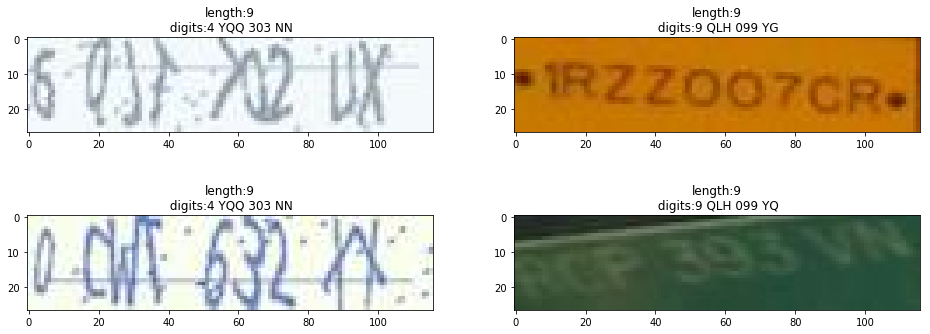

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 6))
for i, ax in enumerate(axes.flat): 
    images_vals = images_val[i]
    length_prediction_vals = length_predictions_val[i]
    digits = digits_predictions_string_val[i]
    letters_predictions_string_vals = letters_predictions_string_val[i]
    letters = []
    for i in range(5):
        letters += chr(letters_predictions_string_vals[i] - 1 + ord('A'))

    st = str(digits[0]) + ' ' + letters[0] + letters[1] + letters[2] + ' ' + str(digits[1]) + str(digits[2]) + str(digits[3]) + ' ' + letters[3] + letters[4]
    ax.set_title('length:' + str(length_prediction_vals) + '\n digits:' + st)
    ax.imshow(images_vals)

In [8]:
sess.close()